感觉书中的代码有问题，要不就是书里的文字表述有问题。  
说是属性对绘图，但实际的代码却是样本对（行）之间的绘制。  
所以后面会先按照书中的描述，对行（样本）进行绘制，然后再对列（属性）进行绘制  

## 载入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，字体名称为win中中文字体对应的英文名
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

In [4]:
try:
    # 第一个参数比较灵活，可以是url,也可是文件路径，或者IO等。
    df_sonar = pd.read_csv("../../data/sonar.csv", header=0)
except Exception as e:
    print(e)
    df_sonar = pd.read_csv(target_url, header=None, prefix='V')
    df_sonar.to_csv("../../data/sonar.csv", index=False)


In [5]:
df_sonar.head()

V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9  ...     V51     V52     V53     V54     V55     V56     V57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078    R  
3  0.0040  0.0117    R  
4  0.0107  0.0094    R  

[5 rows x 61 columns]

## 行（样本对）之间的交会图

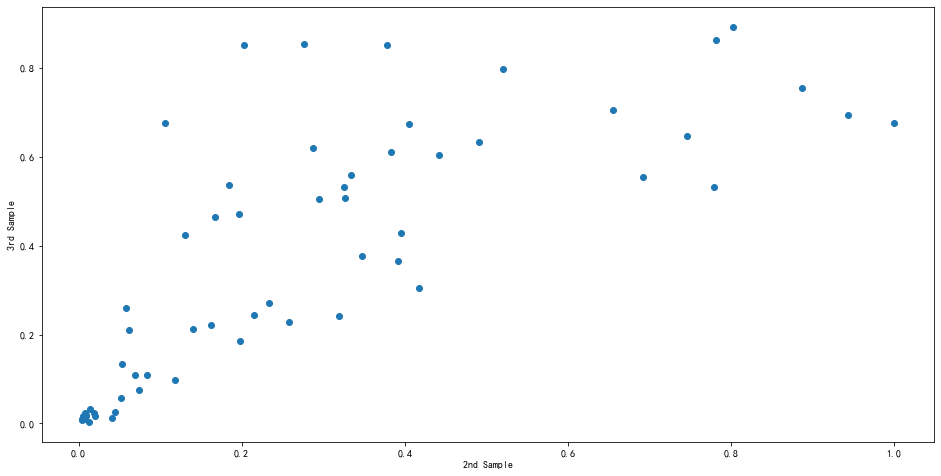

In [6]:
# 第2行和第3行样本值的交会图
data_row2 = df_sonar.iloc[1, :-1]
data_row3 = df_sonar.iloc[2, 0:60]

fig = plt.figure(figsize=(16, 8))
plt.scatter(data_row2, data_row3)
plt.xlabel("2nd Sample")
plt.ylabel("3rd Sample")
plt.show()

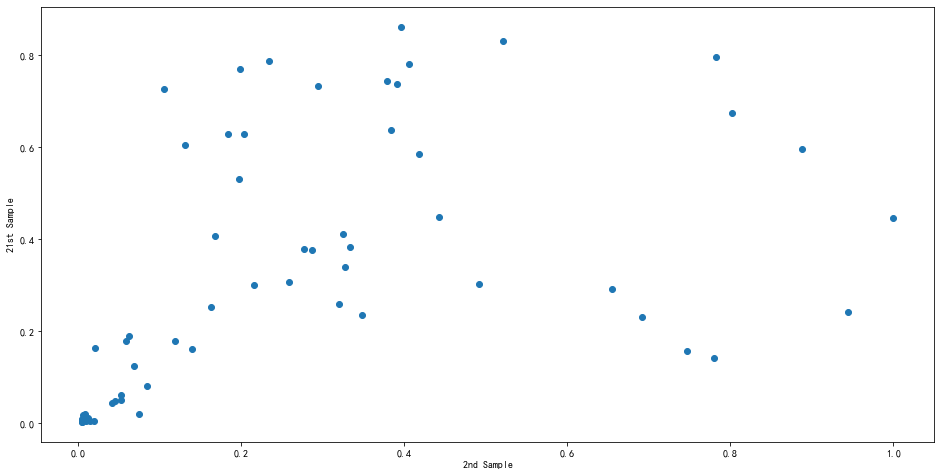

In [7]:
# 第2行和第21行样本值的交会图
data_row21 = df_sonar.iloc[20, 0:60]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_row2, data_row21)
ax.set_xlabel("2nd Sample")
ax.set_ylabel("21st Sample")
plt.show()

## 列（属性对）之间的交会图

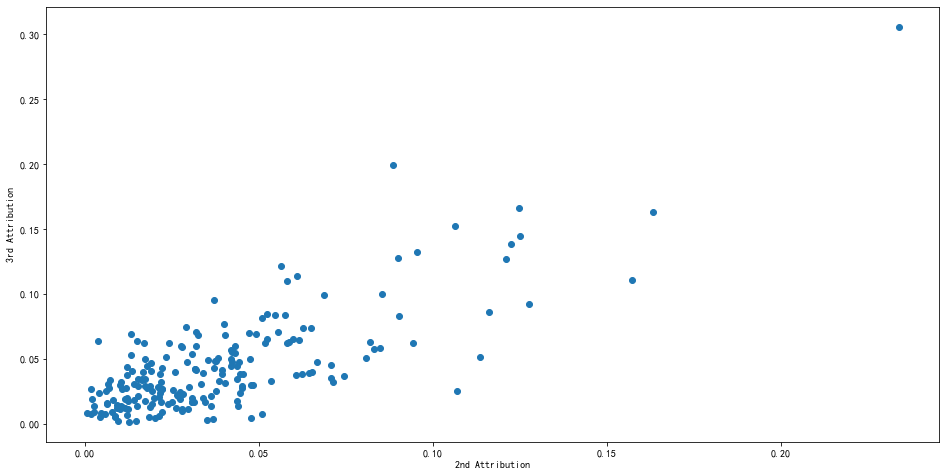

In [8]:
# 第2列和第3列属性值的交会图
data_col2 = df_sonar.iloc[:, 1]
data_col3 = df_sonar.iloc[:, 2]

fig = plt.figure(figsize=(16, 8))
plt.scatter(data_col2, data_col3)
plt.xlabel("2nd Attribution")
plt.ylabel("3rd Attribution")
plt.show()

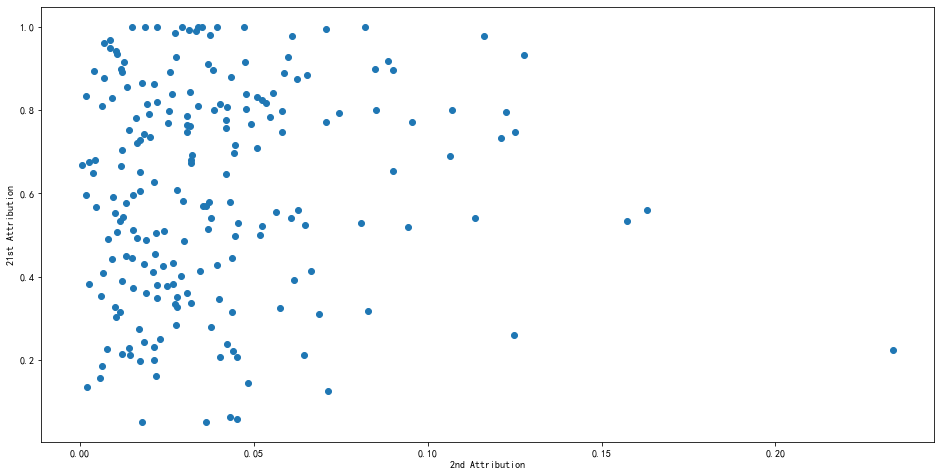

In [9]:
# 第2列和第21列属性值的交会图
data_col21 = df_sonar.iloc[:, 20]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_col2, data_col21)
ax.set_xlabel("2nd Attribution")
ax.set_ylabel("21st Attribution")
plt.show()

如果散点图上的点沿着**一条“瘦”直线排列，则说明这两个变量强相关，如果这些点形成一个球形，则说明这些点不相关**（只是在线性相关角度）